##Importing libraries and then seeding

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

##Importing the dependencies


In [3]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

##Curating the data

In [4]:
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##Data Processing

In [7]:
 type(train_images)

numpy.ndarray

In [9]:
type(train_labels)

numpy.ndarray

In [11]:
print(len(train_images))

60000


In [13]:
print(len(train_labels))

60000


In [15]:
print(train_images[0].shape)    #grayscale image

(28, 28)


In [17]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

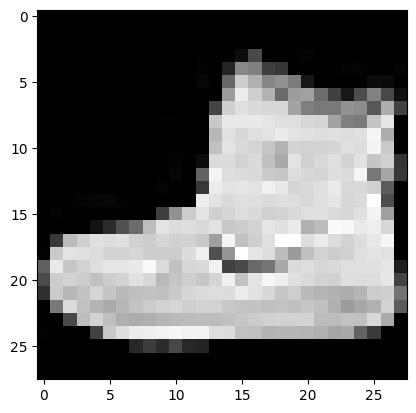

In [23]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [24]:
print(train_labels[0])

9


##Normalize the values

In [26]:
train_images,test_images=train_images/255.0,test_images/255.0

In [28]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

##Convolutional Neural Network

In [30]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

##Training the Model

In [36]:
history=model.fit(train_images,train_labels,epochs=5,
                  validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.4204 - accuracy: 0.8456 - val_loss: 0.4481 - val_accuracy: 0.8345
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.4115 - accuracy: 0.8494 - val_loss: 0.4340 - val_accuracy: 0.8403
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.4032 - accuracy: 0.8525 - val_loss: 0.4242 - val_accuracy: 0.8468
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3941 - accuracy: 0.8558 - val_loss: 0.4202 - val_accuracy: 0.8494
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3870 - accuracy: 0.8586 - val_loss: 0.4197 - val_accuracy: 0.8499


In [38]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("test accuracy: ",test_acc)

313/313 - 4s - loss: 0.4197 - accuracy: 0.8499 - 4s/epoch - 12ms/step
test accuracy:  0.8499000072479248


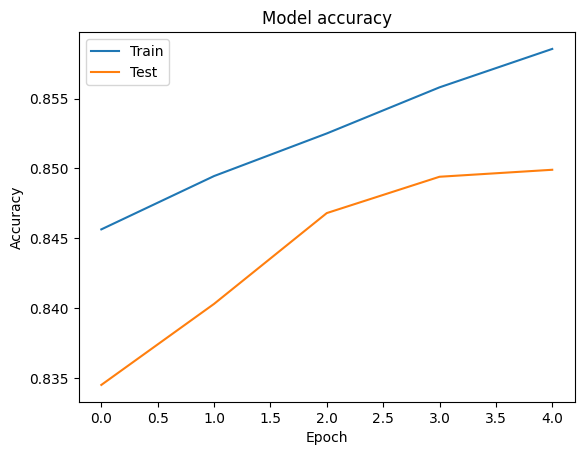

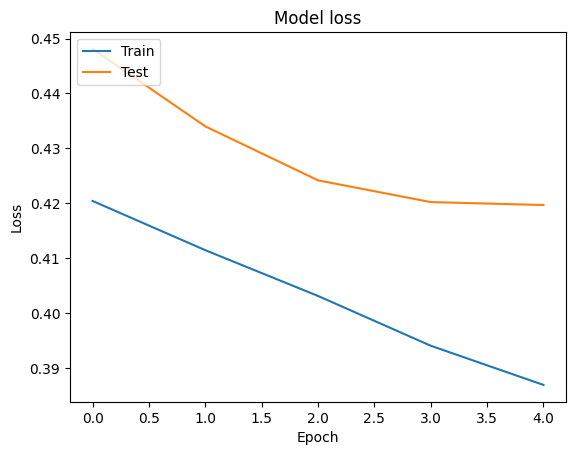

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()



In [43]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
